In [422]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [423]:
data = pd.read_csv("train.csv")
data.shape

(1460, 81)

In [424]:
#아래 Preprocessing 과 EDA, Feature Selection은 1-(1)에서 한것과 동일하게 진행하였습니다.
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold','SalePrice']

In [425]:
#범주형 데이터를 수치화시켜줍니다.
grade_feat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
grade_data = data[grade_feat]
data.shape

(1460, 81)

In [426]:
#문자로 된 범주를 수치로 변환합니다.
level = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num_level = [10, 8, 6, 4, 2]
changed = dict(zip(level, num_level))
#수치로 변환이 완료되면 원래 데이터와 교체합니다.
grade = grade_data.replace(changed)
grade.shape

(1460, 12)

In [427]:
data[grade_feat] = data[grade_feat].replace(changed)
data.shape

(1460, 81)

In [428]:
#범주형 데이터를 제거해줍니다.
#num_feats를 활용해서 범주형 데이터 선언.
cat_feats = data.drop(num_feats, axis=1).columns
#범주형 데이터 제거
data.drop(cat_feats,axis=1,inplace=True)
data.shape

(1460, 45)

In [429]:
#preprocessing 2 : 결측치 제거
data.isnull().sum()[data.isnull().sum() > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
FireplaceQu     690
GarageYrBlt      81
GarageQual       81
GarageCond       81
PoolQC         1453
dtype: int64

In [430]:
#결측치의 개수가 상대적으로 많은 세가지 요소 LotFrontage, FireplaceQu, PoolQC를 제거합니다.
data.drop(['LotFrontage','FireplaceQu','PoolQC'],axis=1,inplace=True)

In [431]:
#결측치를 포함한 행을 제거합니다.
print(data.shape)
data.dropna(axis=0,how='any',inplace=True)
print(data.shape)

(1460, 42)
(1341, 42)


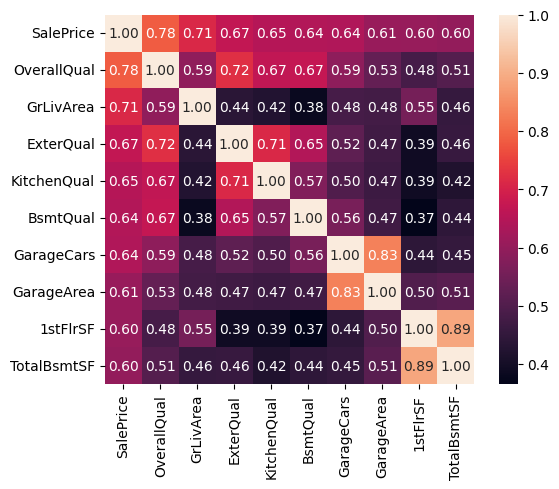

In [432]:
#feature selection
#변수들중 결과와 상관관계가 높은 9가지를 추출하였습니다.
corr = data.corr()
corr_ten = corr.nlargest(10,'SalePrice')['SalePrice']
index = corr_ten.index
corr_mat = np.corrcoef(data[index].values.T)
heatmap = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f'
                      ,yticklabels = index.values,xticklabels = index.values )
plt.show()

In [433]:
dataset = data[index]
X = dataset[index[1:10]]
y = dataset[[index[0]]]

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
scalerX = MinMaxScaler()
scalerX.fit(X_train)
X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)
scalerY = MinMaxScaler()
scalerY.fit(y_train)
y_train_norm = scalerY.transform(y_train)
y_test_norm = scalerY.transform(y_test)

In [435]:
tree = DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4)
tree.fit(X_train_norm,y_train_norm)
y_pred = tree.predict(X_test_norm)

In [436]:
print("MSE : ",mean_squared_error(y_test_norm,y_pred).round(3),
      "\n평가 결과 정확도 : ",tree.score(X_test_norm,y_test_norm).round(3))

MSE :  0.003 
평가 결과 정확도 :  0.812
